In [ ]:
import os

dir_parent = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
os.chdir(dir_parent)
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io as sio
from scipy.io import loadmat
import ruamel.yaml as yaml
yaml = yaml.YAML(typ='rt')

# local folder
from cascade2p import cascade
from cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth

from cascade2p import checks
checks.check_packages()

In [3]:
# extract neuron traces
# path_Fall = "data/Fall_KA45-f1-z130_240303_1-preWsk4bit.mat"
path_Fall = "data/Fall_KA45-f1-z130_240303_1-preWsk4bit_denoised.mat"
name_Fall = os.path.basename(path_Fall).split(".")[0]
# path_roicheck = "data/converted_ROIcheck_KA45-f1-z130_240303_1-preWsk4bit.mat"
path_roicheck = "data/ROIcheck_KA45-f1-z130_240303_1-preWsk4bit_denoised.mat"

F = loadmat(path_Fall, simplify_cells=True)["F"]
roicheck = loadmat(path_roicheck, simplify_cells=True)["manualROIcheck"]
list_date = list(roicheck.keys())
traces = F[roicheck[list_date[-1]]["Neuron"]]

# dF/F0
F0 = np.percentile(traces, 20, axis=1)
traces = (traces - F0[:, None]) / F0[:, None]

In [ ]:
# model name list
cascade.download_model( 'update_models',verbose = 1)

yaml_file = open('Pretrained_models/available_models.yaml')
X = yaml.load(yaml_file)
list_of_models = list(X.keys())
print('\n List of available models: \n')
for model in list_of_models:
    print(model)

In [ ]:
model_name = 'Global_EXC_30Hz_smoothing25ms_causalkernel'

cascade.download_model( model_name,verbose = 1)

In [ ]:
spike_prob = cascade.predict( model_name, traces )

In [ ]:
frame_rate = 30

plt.rcParams['figure.figsize'] = (8.0, 8.0)
np.random.seed(1)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate,spike_prob,title=model_name)

In [ ]:
list_model_name = [
    "Global_EXC_30Hz_smoothing25ms",
    "Global_EXC_30Hz_smoothing25ms_causalkernel",
    "Global_EXC_30Hz_smoothing50ms",
    "Global_EXC_30Hz_smoothing50ms_high_noise",
    "Global_EXC_30Hz_smoothing50ms_causalkernel",
    "Global_EXC_30Hz_smoothing100ms",
    "Global_EXC_30Hz_smoothing100ms_causalkernel",
    "Global_EXC_30Hz_smoothing200ms",
    "Global_EXC_30Hz_smoothing100ms_causalkernel_high_noise",
    "Global_EXC_30Hz_smoothing100ms_high_noise",
    "Global_EXC_30Hz_smoothing200ms_causalkernel_high_noise",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_1_frame",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_2_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_4_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_6_frames",
    "Global_EXC_30Hz_smoothing50ms_asymmetric_window_8_frames",
]

for model_name in list_model_name:
    cascade.download_model( model_name,verbose = 1)
    spike_prob = cascade.predict( model_name, traces )

    frame_rate = 30

    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    np.random.seed(1)
    neuron_indices = np.random.randint(traces.shape[0], size=10)
    plot_dFF_traces(traces,neuron_indices,frame_rate,spike_prob,title=model_name)
    plt.savefig(f'figure/practice/{name_Fall}_{model_name}.png', dpi=300)
    plt.show()

In [ ]:
idx = 2
multiplier = 1

plt.figure()
plt.plot(traces[idx])
plt.plot(spike_prob[idx] * multiplier)
plt.show()

range = (12000, 15000)
plt.figure()
plt.plot(traces[idx, range[0]:range[1]])
plt.plot(spike_prob[idx, range[0]:range[1]] * multiplier)
plt.show()

(80, 20769)


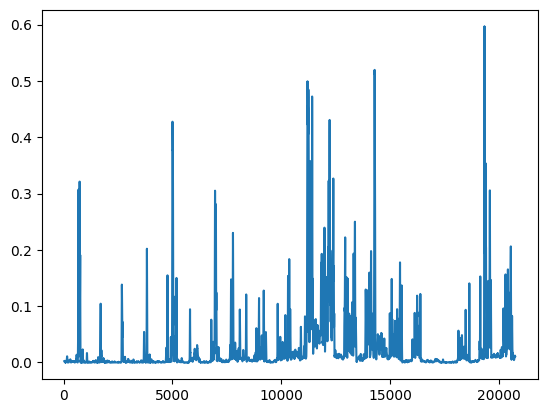

In [6]:
import numpy as np
arr = np.load("D:\Cascade\data\Fall_KA45-f1-z130_240303_1-preWsk4bit_denoised_dff0_cascade.npy")
print(arr.shape)

import matplotlib.pyplot as plt
plt.plot(arr[0])
plt.show()



In [ ]:
name_Fall